In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:/Mayur/ANALYTICS/Data scientist/Neural network and deep learning/tensorflow notebook/TensorFlow_FILES/DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


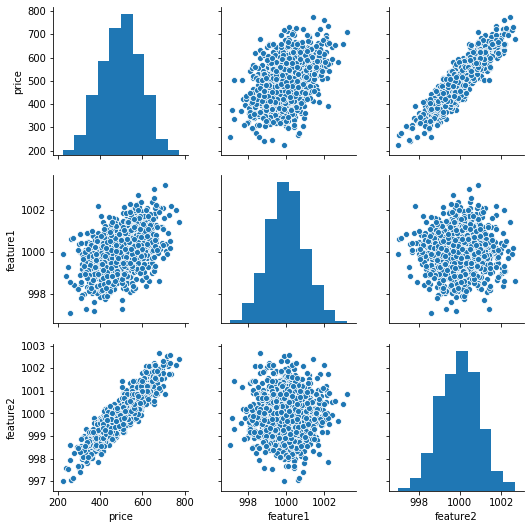

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_Test = train_test_split(X,y,test_size=0.3,random_state=111)

In [9]:
# normalising the data
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
X_train = scaler.transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
# creating neural network

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [22]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 2s 2ms/sample - loss: 254940.0271
Epoch 2/250
700/700 [==============================] - 0s 70us/sample - loss: 254802.7803
Epoch 3/250
700/700 [==============================] - 0s 69us/sample - loss: 254665.0104
Epoch 4/250
700/700 [==============================] - 0s 69us/sample - loss: 254512.9220
Epoch 5/250
700/700 [==============================] - 0s 73us/sample - loss: 254344.1266
Epoch 6/250
700/700 [==============================] - 0s 75us/sample - loss: 254158.9143
Epoch 7/250
700/700 [==============================] - 0s 70us/sample - loss: 253955.6505
Epoch 8/250
700/700 [==============================] - 0s 77us/sample - loss: 253731.9817
Epoch 9/250
700/700 [==============================] - 0s 65us/sample - loss: 253486.8366
Epoch 10/250
700/700 [==============================] - 0s 70us/sample - loss: 253218.3034
Epoch 11/250
700/700 [==============================] - 0s 61us/sample - loss: 

In [25]:
loss_df = pd.DataFrame(model.history.history)

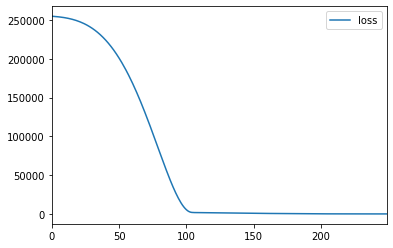

In [26]:
loss_df.plot()

In [28]:
model.evaluate(X_test,y_Test)

300/300 [==============================] - 0s 1ms/sample - loss: 24.5928


24.59277587890625

In [29]:
model.evaluate(X_train,y_train)

700/700 [==============================] - 0s 48us/sample - loss: 24.2203


24.22033695765904

In [30]:
test_preictions = model.predict(X_test)

In [33]:
test_preictions = pd.Series(test_preictions.reshape(300,))

In [34]:
test_preictions

0      631.249146
1      577.596069
2      553.057068
3      610.967590
4      594.094543
          ...    
295    487.582214
296    637.256042
297    541.170532
298    373.108307
299    609.754089
Length: 300, dtype: float32

In [35]:
pred_df = pd.DataFrame(y_Test,columns=['Test True Y'])

In [36]:
pred_df = pd.concat([pred_df,test_preictions],axis=1)

In [39]:
pred_df.columns = ['Test True Y','Model Predictions']
pred_df

,Test True Y,Model Predictions
0,634.248293,631.249146
1,577.582985,577.596069
2,546.231380,553.057068
3,600.368445,610.967590
4,583.065984,594.094543
...,...,...
295,476.071230,487.582214
296,631.371402,637.256042
297,536.590669,541.170532
298,377.570426,373.108307


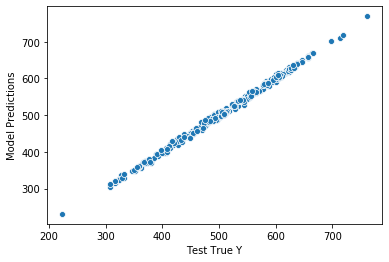

In [40]:
sns.scatterplot(pred_df['Test True Y'],pred_df['Model Predictions'])

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

3.978219911098595

In [44]:
np.sqrt(mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']))

4.959110260687478

In [45]:
new_gem = [[998,1000]]

In [46]:
new_gem = scaler.transform(new_gem)

In [47]:
new_gem

array([[0.15312457, 0.52647994]])

In [48]:
model.predict(new_gem)

array([[420.4279]], dtype=float32)

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save('My_gem_model.h5')

In [51]:
later_model = load_model('My_gem_model.h5')

In [52]:
later_model.predict(new_gem)

array([[420.4279]], dtype=float32)